In [1]:
import pandas as pd
import numpy as np

In [2]:
#load in textsent dataset
textsent = pd.read_csv('./textsent.csv')
textsent.head()

,Unnamed: 0,date,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,0,2016-01-01,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-01-04,0.034895,0.006244,0.00000,0.000000,0.0,0.019073,0.000000,0.007601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016-01-05,0.000000,0.000000,0.00000,-0.049886,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-01-06,0.003470,0.000000,0.00342,0.095066,0.0,0.076383,0.024897,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016-01-07,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
stock_prices = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_yahoo.csv')

In [7]:
prices = stock_prices[['Date', 'Close']]

In [8]:
prices.head()

,Date,Close
0,2000-02-08,4.102679
1,2000-02-09,4.022321
2,2000-02-10,4.053571
3,2000-02-11,3.883929
4,2000-02-14,4.136161


In [9]:
textsent_df = textsent.drop('Unnamed: 0', axis=1)

In [11]:
from datetime import datetime, date

In [13]:
prices['Date'] = pd.Series(prices['Date']).astype('datetime64[ms]')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
#convert date column to datetime objects
better = []
for i in list(prices['Date']):
    d = datetime.strptime(str(i)[:10], '%Y-%m-%d').date()
    better.append(d)
prices['Date'] = better
prices.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Close
0,2000-02-08,4.102679
1,2000-02-09,4.022321
2,2000-02-10,4.053571
3,2000-02-11,3.883929
4,2000-02-14,4.136161


In [16]:
good = []
for i in list(textsent['date']):
    d = datetime.strptime(i, '%Y-%m-%d').date()
    good.append(d)
textsent['date'] = good
textsent.head()

,Unnamed: 0,date,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,0,2016-01-01,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-01-04,0.034895,0.006244,0.00000,0.000000,0.0,0.019073,0.000000,0.007601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016-01-05,0.000000,0.000000,0.00000,-0.049886,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-01-06,0.003470,0.000000,0.00342,0.095066,0.0,0.076383,0.024897,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016-01-07,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#only use intersection of approval data and news coverage timeframes
shared_dates = []
l = list(prices['Date'])
for d in list(textsent['date']):
    if d in l:
        shared_dates.append(d)

In [23]:
textsent_df = textsent.loc[textsent['date'].isin(shared_dates)]
price_df = prices.loc[prices['Date'].isin(shared_dates)]

In [24]:
price_df = price_df.rename(columns={'Date':'date'})
price_df.head()

,date,Close
4000,2016-01-04,105.349998
4001,2016-01-05,102.709999
4002,2016-01-06,100.699997
4003,2016-01-07,96.449997
4004,2016-01-08,96.959999


4000    105.349998
4001    102.709999
4002    100.699997
4003     96.449997
4004     96.959999
4005     98.529999
4006     99.959999
4007     97.389999
4008     99.519997
4009     97.129997
4010     96.660004
4011     96.790001
4012     96.300003
4013    101.419998
4014     99.440002
4015     99.989998
4016     93.419998
4017     94.089996
4018     97.339996
4019     96.430000
4020     94.480003
4021     96.349998
4022     96.599998
4023     94.019997
4024     95.010002
4025     94.989998
4027     93.699997
4028     93.989998
4029     96.639999
4030     98.120003
           ...    
4794    174.970001
4795    175.850006
4796    175.529999
4797    174.520004
4798    172.500000
4799    172.910004
4800    178.899994
4801    180.910004
4802    181.710007
4803    183.729996
4804    186.119995
4805    188.020004
4806    186.529999
4807    188.160004
4808    195.089996
4809    191.050003
4810    188.740005
4811    186.789993
4812    188.470001
4813    188.720001
4814    189.949997
4815    191.

In [30]:
textsent_df = textsent_df.drop('Unnamed: 0', axis=1)

In [31]:
#convert sentiment data to 30-day moving averages (for smoother data)
movingAverage = 30
textsent_nodates = textsent_df.iloc[:,1:]
rolling_windows = textsent_nodates.rolling(movingAverage,1)
rolling_mean = rolling_windows.mean()
textsent_nodates = rolling_mean

In [33]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [35]:
#scale data
dfTest = textsent_nodates.copy(deep=True)
cols = dfTest.columns
cols = cols[1:]
dfTest[cols] = scaler.fit_transform(dfTest[cols])
dfTest.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.034895,0.324355,0.339089,0.501735,0.52375,0.627699,0.383599,0.585892,0.522963,0.401113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.017448,0.290910,0.339089,0.229607,0.52375,0.518975,0.383599,0.544811,0.522963,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012789,0.279762,0.347465,0.666039,0.52375,0.773014,0.438909,0.531117,0.522963,0.133704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009591,0.274188,0.345371,0.624963,0.52375,0.682323,0.425081,0.524270,0.522963,0.200557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.007673,0.270844,0.344115,0.600317,0.52375,0.627909,0.416785,0.520162,0.522963,0.240668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
shared_textsent_df = dfTest
shared_textsent_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.034895,0.324355,0.339089,0.501735,0.52375,0.627699,0.383599,0.585892,0.522963,0.401113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.017448,0.290910,0.339089,0.229607,0.52375,0.518975,0.383599,0.544811,0.522963,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012789,0.279762,0.347465,0.666039,0.52375,0.773014,0.438909,0.531117,0.522963,0.133704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009591,0.274188,0.345371,0.624963,0.52375,0.682323,0.425081,0.524270,0.522963,0.200557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.007673,0.270844,0.344115,0.600317,0.52375,0.627909,0.416785,0.520162,0.522963,0.240668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.decomposition import PCA

In [159]:
train = shared_textsent_df[:640]
test = shared_textsent_df[640:800]

In [160]:
pca = PCA(n_components = 0.95)
pca.fit(train)
train_X = pca.transform(train)

In [161]:
test_X = pca.transform(test)

In [173]:
price = price_df['Close'].iloc[30:830]

In [174]:
train_y=price[:640]
test_y=price[640:]
print(train_y.shape, test_y.shape, train_X.shape, test_X.shape)

(640,) (160,) (640, 1, 33) (160, 1, 33)


In [175]:
train_y = np.array(train_y)
test_y = np.array(test_y)

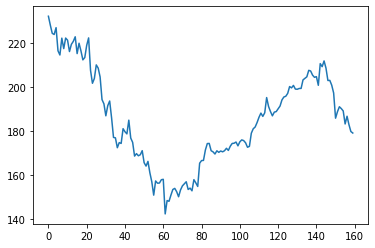

In [176]:
plt.plot(test_y)

In [177]:
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))

ValueError: cannot reshape array of size 21120 into shape (640,1,1)

In [178]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.losses import Huber

In [179]:
#basic non-stacked lstm model
model = Sequential()
model.add(LSTM(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [180]:
#stacked lstm model

dropout=0.10
model1 = Sequential()

model1.add(LSTM(60, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='relu'))
model1.add(Dropout(dropout))
model1.add(LSTM(120, return_sequences=True, activation='relu'))
model1.add(Dropout(dropout))
model1.add(LSTM(240, return_sequences=True, activation='relu'))
model1.add(Dropout(dropout))
model1.add(LSTM(60, activation='relu'))
model1.add(Dense(units=1))
model1.add(Activation('relu'))

model1.compile(optimizer='adam', loss='mse')

In [181]:
import matplotlib.pyplot as plt

Epoch 1/1000
640/640 [==============================] - 2s 3ms/step - loss: 22709.8270
Epoch 2/1000
640/640 [==============================] - 0s 295us/step - loss: 22701.4308
Epoch 3/1000
640/640 [==============================] - 0s 298us/step - loss: 22684.6673
Epoch 4/1000
640/640 [==============================] - 0s 337us/step - loss: 22643.5950
Epoch 5/1000
640/640 [==============================] - 0s 439us/step - loss: 22514.9264
Epoch 6/1000
640/640 [==============================] - 0s 424us/step - loss: 21997.7001
Epoch 7/1000
640/640 [==============================] - 0s 447us/step - loss: 19706.9182
Epoch 8/1000
640/640 [==============================] - 0s 360us/step - loss: 13356.1658
Epoch 9/1000
640/640 [==============================] - 0s 306us/step - loss: 3454.2366
Epoch 10/1000
640/640 [==============================] - 0s 337us/step - loss: 1797.7314
Epoch 11/1000
640/640 [==============================] - 0s 332us/step - loss: 1301.4820
Epoch 12/1000
640/640 [=

640/640 [==============================] - 0s 566us/step - loss: 154.5934
Epoch 95/1000
640/640 [==============================] - 0s 495us/step - loss: 157.1593
Epoch 96/1000
640/640 [==============================] - 0s 437us/step - loss: 140.5544
Epoch 97/1000
640/640 [==============================] - 0s 424us/step - loss: 154.9860
Epoch 98/1000
640/640 [==============================] - 0s 373us/step - loss: 117.7972
Epoch 99/1000
640/640 [==============================] - 0s 407us/step - loss: 139.9519
Epoch 100/1000
640/640 [==============================] - 0s 360us/step - loss: 135.2702
Epoch 101/1000
640/640 [==============================] - 0s 303us/step - loss: 151.3399
Epoch 102/1000
640/640 [==============================] - 0s 337us/step - loss: 166.0656
Epoch 103/1000
640/640 [==============================] - 0s 298us/step - loss: 151.7882
Epoch 104/1000
640/640 [==============================] - 0s 310us/step - loss: 147.7383
Epoch 105/1000
640/640 [=================

640/640 [==============================] - 0s 332us/step - loss: 107.4136
Epoch 187/1000
640/640 [==============================] - 0s 331us/step - loss: 111.1863
Epoch 188/1000
640/640 [==============================] - 0s 340us/step - loss: 96.4726
Epoch 189/1000
640/640 [==============================] - 0s 346us/step - loss: 103.0052
Epoch 190/1000
640/640 [==============================] - 0s 315us/step - loss: 97.4727
Epoch 191/1000
640/640 [==============================] - 0s 343us/step - loss: 108.9165
Epoch 192/1000
640/640 [==============================] - 0s 347us/step - loss: 96.5072
Epoch 193/1000
640/640 [==============================] - 0s 320us/step - loss: 93.1024
Epoch 194/1000
640/640 [==============================] - 0s 352us/step - loss: 92.0473
Epoch 195/1000
640/640 [==============================] - 0s 314us/step - loss: 97.3183
Epoch 196/1000
640/640 [==============================] - 0s 595us/step - loss: 86.6671
Epoch 197/1000
640/640 [===================

640/640 [==============================] - 0s 652us/step - loss: 69.8465
Epoch 280/1000
640/640 [==============================] - 0s 649us/step - loss: 70.8739
Epoch 281/1000
640/640 [==============================] - 0s 509us/step - loss: 76.0887
Epoch 282/1000
640/640 [==============================] - 0s 607us/step - loss: 68.4527
Epoch 283/1000
640/640 [==============================] - 1s 893us/step - loss: 71.0232
Epoch 284/1000
640/640 [==============================] - 0s 603us/step - loss: 70.0223
Epoch 285/1000
640/640 [==============================] - 0s 432us/step - loss: 69.1819
Epoch 286/1000
640/640 [==============================] - 0s 414us/step - loss: 70.8509
Epoch 287/1000
640/640 [==============================] - 0s 320us/step - loss: 75.1894
Epoch 288/1000
640/640 [==============================] - 0s 291us/step - loss: 77.7416
Epoch 289/1000
640/640 [==============================] - 0s 301us/step - loss: 88.8183
Epoch 290/1000
640/640 [=======================

640/640 [==============================] - 0s 394us/step - loss: 65.0989
Epoch 373/1000
640/640 [==============================] - 0s 401us/step - loss: 63.4843
Epoch 374/1000
640/640 [==============================] - 0s 578us/step - loss: 58.2444
Epoch 375/1000
640/640 [==============================] - 0s 512us/step - loss: 56.9905
Epoch 376/1000
640/640 [==============================] - 0s 488us/step - loss: 61.3090
Epoch 377/1000
640/640 [==============================] - 0s 417us/step - loss: 63.4805
Epoch 378/1000
640/640 [==============================] - 0s 492us/step - loss: 56.2340
Epoch 379/1000
640/640 [==============================] - 0s 434us/step - loss: 62.6473
Epoch 380/1000
640/640 [==============================] - 0s 478us/step - loss: 80.5878
Epoch 381/1000
640/640 [==============================] - 0s 400us/step - loss: 61.4669
Epoch 382/1000
640/640 [==============================] - 0s 392us/step - loss: 77.5576
Epoch 383/1000
640/640 [=======================

640/640 [==============================] - 0s 298us/step - loss: 71.9674
Epoch 466/1000
640/640 [==============================] - 0s 295us/step - loss: 66.2172
Epoch 467/1000
640/640 [==============================] - 0s 309us/step - loss: 72.7340
Epoch 468/1000
640/640 [==============================] - 0s 337us/step - loss: 108.7594
Epoch 469/1000
640/640 [==============================] - 0s 568us/step - loss: 58.6160
Epoch 470/1000
640/640 [==============================] - 0s 470us/step - loss: 82.0188
Epoch 471/1000
640/640 [==============================] - 0s 352us/step - loss: 72.1264
Epoch 472/1000
640/640 [==============================] - 0s 356us/step - loss: 47.8788
Epoch 473/1000
640/640 [==============================] - 0s 310us/step - loss: 55.5370
Epoch 474/1000
640/640 [==============================] - 0s 320us/step - loss: 50.4153
Epoch 475/1000
640/640 [==============================] - 0s 317us/step - loss: 55.3655
Epoch 476/1000
640/640 [======================

640/640 [==============================] - 0s 286us/step - loss: 39.6564
Epoch 559/1000
640/640 [==============================] - 0s 269us/step - loss: 49.2123
Epoch 560/1000
640/640 [==============================] - 0s 296us/step - loss: 41.3674
Epoch 561/1000
640/640 [==============================] - 0s 274us/step - loss: 44.2018
Epoch 562/1000
640/640 [==============================] - 0s 263us/step - loss: 41.3030
Epoch 563/1000
640/640 [==============================] - 0s 301us/step - loss: 43.4241
Epoch 564/1000
640/640 [==============================] - 0s 271us/step - loss: 43.9890
Epoch 565/1000
640/640 [==============================] - 0s 287us/step - loss: 52.8182
Epoch 566/1000
640/640 [==============================] - 0s 360us/step - loss: 50.4416
Epoch 567/1000
640/640 [==============================] - 0s 319us/step - loss: 59.1074
Epoch 568/1000
640/640 [==============================] - 0s 379us/step - loss: 53.7765
Epoch 569/1000
640/640 [=======================

640/640 [==============================] - 0s 501us/step - loss: 47.4313
Epoch 652/1000
640/640 [==============================] - 0s 450us/step - loss: 41.3130
Epoch 653/1000
640/640 [==============================] - 0s 428us/step - loss: 44.8490
Epoch 654/1000
640/640 [==============================] - 0s 469us/step - loss: 47.3049
Epoch 655/1000
640/640 [==============================] - 0s 400us/step - loss: 51.9948
Epoch 656/1000
640/640 [==============================] - 0s 359us/step - loss: 41.5111
Epoch 657/1000
640/640 [==============================] - 0s 276us/step - loss: 58.1622
Epoch 658/1000
640/640 [==============================] - 0s 229us/step - loss: 47.6718
Epoch 659/1000
640/640 [==============================] - 0s 210us/step - loss: 70.3593
Epoch 660/1000
640/640 [==============================] - 0s 375us/step - loss: 41.8027
Epoch 661/1000
640/640 [==============================] - 0s 433us/step - loss: 50.2321
Epoch 662/1000
640/640 [=======================

640/640 [==============================] - 0s 458us/step - loss: 42.0602
Epoch 745/1000
640/640 [==============================] - 0s 504us/step - loss: 37.1134
Epoch 746/1000
640/640 [==============================] - 0s 422us/step - loss: 40.5579
Epoch 747/1000
640/640 [==============================] - 0s 531us/step - loss: 33.7615
Epoch 748/1000
640/640 [==============================] - 0s 445us/step - loss: 38.6372
Epoch 749/1000
640/640 [==============================] - 0s 409us/step - loss: 40.9048
Epoch 750/1000
640/640 [==============================] - 0s 342us/step - loss: 42.6117
Epoch 751/1000
640/640 [==============================] - 0s 583us/step - loss: 41.2535
Epoch 752/1000
640/640 [==============================] - 0s 440us/step - loss: 38.5606
Epoch 753/1000
640/640 [==============================] - 0s 482us/step - loss: 43.6349
Epoch 754/1000
640/640 [==============================] - 0s 422us/step - loss: 36.8427
Epoch 755/1000
640/640 [=======================

640/640 [==============================] - 0s 414us/step - loss: 34.1658
Epoch 838/1000
640/640 [==============================] - 0s 424us/step - loss: 36.8183
Epoch 839/1000
640/640 [==============================] - 0s 398us/step - loss: 33.0092
Epoch 840/1000
640/640 [==============================] - 0s 415us/step - loss: 38.9854
Epoch 841/1000
640/640 [==============================] - 0s 388us/step - loss: 38.9322
Epoch 842/1000
640/640 [==============================] - 0s 408us/step - loss: 50.0571
Epoch 843/1000
640/640 [==============================] - 0s 469us/step - loss: 44.6900
Epoch 844/1000
640/640 [==============================] - 0s 369us/step - loss: 39.2142
Epoch 845/1000
640/640 [==============================] - 0s 356us/step - loss: 43.7101
Epoch 846/1000
640/640 [==============================] - 0s 396us/step - loss: 42.9492
Epoch 847/1000
640/640 [==============================] - 0s 334us/step - loss: 61.2349
Epoch 848/1000
640/640 [=======================

640/640 [==============================] - 0s 312us/step - loss: 36.3514
Epoch 931/1000
640/640 [==============================] - 0s 228us/step - loss: 30.5692
Epoch 932/1000
640/640 [==============================] - 0s 362us/step - loss: 37.4976
Epoch 933/1000
640/640 [==============================] - 0s 377us/step - loss: 37.1763
Epoch 934/1000
640/640 [==============================] - 0s 448us/step - loss: 34.8467
Epoch 935/1000
640/640 [==============================] - 0s 421us/step - loss: 37.6454
Epoch 936/1000
640/640 [==============================] - 0s 358us/step - loss: 36.7649
Epoch 937/1000
640/640 [==============================] - 0s 454us/step - loss: 36.5344
Epoch 938/1000
640/640 [==============================] - 0s 358us/step - loss: 43.79870s - loss: 33.
Epoch 939/1000
640/640 [==============================] - 0s 384us/step - loss: 36.5837
Epoch 940/1000
640/640 [==============================] - 0s 360us/step - loss: 33.8438
Epoch 941/1000
640/640 [=========

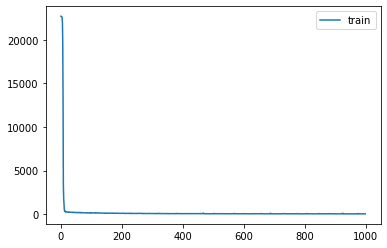

In [182]:
#train stacked lstm model
history=model1.fit(train_X, train_y, epochs=1000, shuffle=False, batch_size=64, verbose=1)
model1.save('./attempt6.h5')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.savefig('./loss_30day_layers.png')
plt.show()

In [191]:
pred = model1.predict(test_X)
actual = test_y

In [192]:
scaler1 = preprocessing.MinMaxScaler()
actual = scaler1.fit_transform(actual.reshape(-1,1))
pred = scaler1.transform(pred.reshape(-1,1))

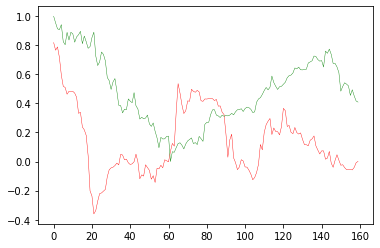

<Figure size 432x288 with 0 Axes>

In [193]:
plt.plot(pred, color='r',linewidth=0.4)
plt.plot(actual, color='g', linewidth=0.4)
plt.show()
plt.savefig('./predicted_approval_30day.png')

In [194]:
#calculate model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [195]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [197]:
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(0.21826766141387174, 0.4671912471503204, 0.4110639527095472)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
